<a href="https://colab.research.google.com/github/simplgithub/ECE-2021-FIN-E-Ing4-Finance-Gr02-IA1/blob/main/TP5_KOFFI_NGUENA_SISSOKO_ABOUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TP 5 DE MACHINE LEARNING
**Groupe :**
1. KOFFI N'guessan Joel
2. SISSOKO Daly
3. NGUENA Foning Fitzgerald
4. ABOUA Boni Yacienthe

### Importation et paramétrage graphiques

In [ ]:
# importing libraries
import matplotlib as mpl
from matplotlib import cycler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import random
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# graphic settings
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

In [ ]:
# import file function and import
def file_import(df, col):
  df = pd.read_csv(df, delimiter="\t", header=None, decimal=",")
  df.columns = ["Date", "close"]
  df.set_index("Date", inplace = True)
  new_col_name = "close" + "_" + col
  dict = {'close': new_col_name} 
  df.rename(columns=dict, inplace=True)
  return df

df_VIX = file_import("VIX.txt", "VIX")
df_SPX = file_import("SPX.txt", "SPX")
df_USGG2YR = file_import("USGG2YR.txt", "USGG2YR")

In [ ]:
def feature_engineering(df, col):
  # We copy the dataframe to avoid interferences in the data
  df_copy = df.copy()

    # Create the returns
  new_col_name_returns = "returns" + "_" + col
  df_copy[new_col_name_returns] = df_copy.iloc[:,-1].pct_change(1)

    # Create the SMAs
  new_col_name_SMA_15 = "SMA 15" + "_" + col
  new_col_name_SMA_60 = "SMA 60" + "_" + col
  df_copy[new_col_name_SMA_15] = df_copy.iloc[:, -1].rolling(15).mean().shift(1)
  df_copy[new_col_name_SMA_60] = df_copy.iloc[:, -1].rolling(60).mean().shift(1) 

  # Create the volatilities
  new_col_name_MSD_10 = "MSD 10" + "_" + col
  new_col_name_MSD_30 = "MSD 30" + "_" + col
  df_copy[new_col_name_MSD_10] = df_copy[[new_col_name_returns]].rolling(10).std().shift(1)
  df_copy[new_col_name_MSD_30] = df_copy[[new_col_name_returns]].rolling(30).std().shift(1)
  df_copy = df_copy.reset_index()

  return df_copy.dropna()

  # news datasets
df_VIX = feature_engineering(df_VIX, "VIX")
df_SPX = feature_engineering(df_SPX, "SPX")
df_USGG2YR = feature_engineering(df_USGG2YR, "USGG2YR")

 # final data base
df = df_VIX.merge(df_SPX, on="Date") \
           .merge(df_USGG2YR, on="Date") 
df.set_index("Date", inplace = True)

In [ ]:
print(df.shape)
print(df)

(1216, 18)
            close_VIX  returns_VIX  SMA 15_VIX  SMA 60_VIX  MSD 10_VIX  \
Date                                                                     
21/06/1996      15.80    -0.152361    0.013927    0.008886    0.087788   
28/06/1996      13.68    -0.134177   -0.012099    0.009168    0.099970   
05/07/1996      16.09     0.176170   -0.007647    0.008856    0.100553   
12/07/1996      17.09     0.062150    0.002042    0.008693    0.115266   
19/07/1996      17.26     0.009947   -0.000970    0.008630    0.109303   
...               ...          ...         ...         ...         ...   
06/09/2019      15.00    -0.209694    0.021207    0.010703    0.173520   
13/09/2019      13.74    -0.084000    0.007687    0.011625    0.189547   
20/09/2019      15.32     0.114993   -0.009942    0.012202    0.187098   
27/09/2019      17.22     0.124021    0.006311    0.012508    0.186820   
04/10/2019      17.04    -0.010453    0.018751    0.012859    0.183995   

            MSD 30_VIX  cl

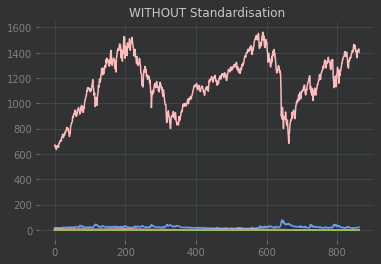

In [ ]:
# Percentage train set
split = int(len(df)-353)

# Train set creation
X_train = df[['close_VIX', 'SMA 15_VIX', 'SMA 60_VIX', 'MSD 10_VIX',
              'MSD 30_VIX', 'close_SPX', 'returns_SPX', 'SMA 15_SPX', 'SMA 60_SPX',
              'MSD 10_SPX', 'MSD 30_SPX', 'close_USGG2YR', 'returns_USGG2YR',
              'SMA 15_USGG2YR', 'SMA 60_USGG2YR', 'MSD 10_USGG2YR', 'MSD 30_USGG2YR']] \
              .iloc[:split,:]
y_train = df[["returns_VIX"]].iloc[:split,:]

# Test set creation
X_test = df[['close_VIX', 'SMA 15_VIX', 'SMA 60_VIX', 'MSD 10_VIX',
              'MSD 30_VIX', 'close_SPX', 'returns_SPX', 'SMA 15_SPX', 'SMA 60_SPX',
              'MSD 10_SPX', 'MSD 30_SPX', 'close_USGG2YR', 'returns_USGG2YR',
              'SMA 15_USGG2YR', 'SMA 60_USGG2YR', 'MSD 10_USGG2YR', 'MSD 30_USGG2YR']] \
            .iloc[split:,:]
y_test = df[['returns_VIX']].iloc[split:,:]

# Standardization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

plt.plot(X_train.values)
plt.title("WITHOUT Standardisation")
plt.show()

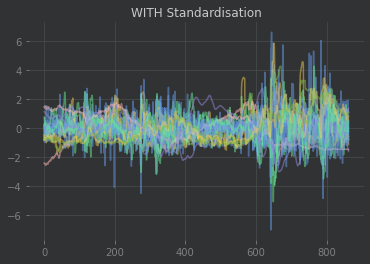

In [ ]:

plt.plot(X_train_sc, alpha=0.5)
plt.title("WITH Standardisation")
plt.show()

**Les graphiques ci-dessus confirment la nécessité de normaliser les données avant de les utiliser puisque ces dernier n'avaient pas un même ordre de grandeur.**

# Deep Neurone Network 


Epoch 1/100
27/27 [==============================] - 3s 36ms/step - loss: 0.0161 - val_loss: 0.0314
Epoch 2/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0160 - val_loss: 0.0314
Epoch 3/100
27/27 [==============================] - 1s 19ms/step - loss: 0.0159 - val_loss: 0.0315
Epoch 4/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0160 - val_loss: 0.0314
Epoch 5/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0160 - val_loss: 0.0314
Epoch 6/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0159 - val_loss: 0.0314
Epoch 7/100
27/27 [==============================] - 1s 19ms/step - loss: 0.0159 - val_loss: 0.0315
Epoch 8/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0160 - val_loss: 0.0314
Epoch 9/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0160 - val_loss: 0.0315
Epoch 10/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0160 - val_loss: 0.0315

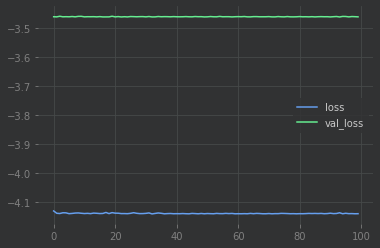

In [ ]:
#Deep Neurone Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nb_hidden_layer = 50 
# initialization sequential model
regressor = Sequential()
# first layer
regressor.add(Dense(500, input_shape=(X_train_sc.shape[1],), activation="relu"))
# add hidden layer
for i in range(1,nb_hidden_layer):
  regressor.add(Dense(int(500/i), activation="relu"))
# poutput layer dense
regressor.add(Dense(1, activation="linear"))
# compile the model
regressor.compile(loss="mse", optimizer="adam")
# training
regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)
np.log(pd.DataFrame(regressor.history.history)).plot()

**Nous avons le pire des modèles qui puisse exister. Aussitôt, il connait les données d'entrainement par coeur et ne parviens pas à améliorer sa capacité de prédire sur des données qu'il n'a jamais vu.** 

**En effet ce dernier fait parfaitement de l'overfitting.**

**Notre nouvelle démarche consistera à réduire le nombre de neuronnes de la couche dense et le nombre de couche cachées.**

In [ ]:
# Percentage train set
split = int(len(df)-353)

# Train set creation
X_train = df[['close_VIX', 'SMA 15_VIX', 'SMA 60_VIX', 'MSD 10_VIX',
              'MSD 30_VIX', 'close_SPX', 'returns_SPX', 'SMA 15_SPX', 'SMA 60_SPX',
              'MSD 10_SPX', 'MSD 30_SPX', 'close_USGG2YR', 'returns_USGG2YR',
              'SMA 15_USGG2YR', 'SMA 60_USGG2YR', 'MSD 10_USGG2YR', 'MSD 30_USGG2YR']] \
              .iloc[:split,:]
y_train = df[["returns_VIX"]].iloc[:split,:]

# Test set creation
X_test = df[['close_VIX', 'SMA 15_VIX', 'SMA 60_VIX', 'MSD 10_VIX',
              'MSD 30_VIX', 'close_SPX', 'returns_SPX', 'SMA 15_SPX', 'SMA 60_SPX',
              'MSD 10_SPX', 'MSD 30_SPX', 'close_USGG2YR', 'returns_USGG2YR',
              'SMA 15_USGG2YR', 'SMA 60_USGG2YR', 'MSD 10_USGG2YR', 'MSD 30_USGG2YR']] \
            .iloc[split:,:]
y_test = df[['returns_VIX']].iloc[split:,:]

# Standardization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

nb_hidden_layer = 5
# initialization sequential model
regressor = Sequential()
# first layer
regressor.add(Dense(100, input_shape=(X_train_sc.shape[1],), activation="relu"))
# add hidden layer
for i in range(1,nb_hidden_layer):
  regressor.add(Dense(int(100/i), activation="relu"))
# poutput layer dense
regressor.add(Dense(1, activation="linear"))
# compile the model
regressor.compile(loss="mse", optimizer="adam")
# training
regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100)


Epoch 1/100
27/27 [==============================] - 1s 10ms/step - loss: 0.0125 - val_loss: 0.0229
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0267
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0227
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0205
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0178
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0204
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0171
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0258
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0189
Epoch 10/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0242
Epoch 11

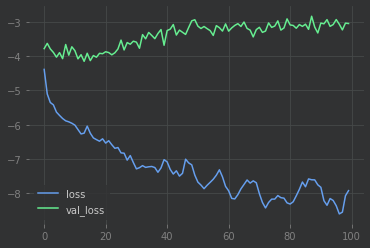

In [ ]:
np.log(pd.DataFrame(regressor.history.history)).plot()

**On constate que plus les époques augmentent, plus les erreurs sur notre jeu sur notre jeu de données d'entrainement diminue (ce qui est normal) mais malheuresement le modèle s'adapte trop au point où il devient de plus en plus mauvais sur la prédiction des données test.**

**Pour résoudre ce problème de surapprentissage, Nous allons résoudre ce problème en créant un EarlingStopping.**

Epoch 1/100
27/27 [==============================] - 1s 9ms/step - loss: 0.0596 - val_loss: 0.1222
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0343 - val_loss: 0.1031
Epoch 3/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0243 - val_loss: 0.0863
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0190 - val_loss: 0.0740
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.0684
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0146 - val_loss: 0.0650
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.0579
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.0559
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.0549
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 0.0116 - val_loss: 0.0547
Epoch 11/

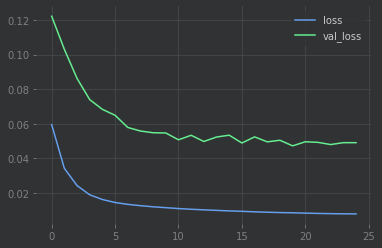

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nb_hidden_layer = 2
# initialisation sequential model
regressor = Sequential()
# first layer
regressor.add(Dense(10, input_shape=(X_train_sc.shape[1],), activation="relu"))
# add hidden layer
for i in range(1,nb_hidden_layer):
  regressor.add(Dense(int(10/i), activation="relu"))
# output layer dense
regressor.add(Dense(1, activation="linear"))
# compile the model
regressor.compile(loss="mse", optimizer="adam")
early_stop = EarlyStopping(verbose=1, patience = 5)
regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100, callbacks=[early_stop])

pd.DataFrame(regressor.history.history).plot()

**Le modèle est acceptable. On analyse maintenant la performance de notre stratégie**

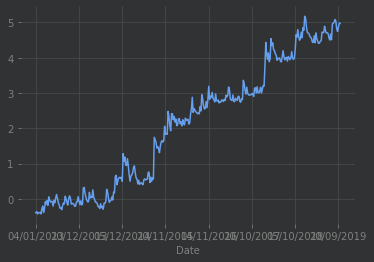

In [ ]:
# Create predictions for the whole dataset (two positions are retained, namely betting on the rise or on the fall)
df["prediction"] = regressor.predict(np.concatenate((X_train_sc,X_test_sc), axis=0))
df["strategy"] = df["returns_VIX"] * np.sign(df["prediction"].shift(1))
df["strategy"].iloc[split:].cumsum().plot()

**Avec une tendance visiblement haussière et une faible volatilité nous concluons que notre stratégie est bonne. Elle nous permet d'accumuler sereinement de petits gains au fil du temps avec un très faible risque de décrochage.**

In [ ]:
round(df["strategy"].iloc[split:].cumsum().max(), 2)

5.17

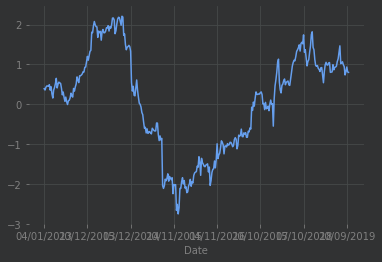

In [ ]:
df["prediction_random"] = [(random.uniform(0, 1) - 0.5) for p in range(0, len(df["prediction"]))]
df["strategy_random"] = df["returns_VIX"] * np.sign(df["prediction_random"].shift(1))
df["strategy_random"].iloc[split:].cumsum().plot()

In [ ]:
round(df["strategy_random"].iloc[split:].cumsum().max(), 2)

2.21

**Par ailleurs, les gains issus de ce scénario aléatoire ne represente qu'un pur hasard meme comme ils ne sont pas négligeagles. Cette statégie n'est pas sûre puisqu'il y a une très forte volatilité d'où un énorme risque de tout perdre à tout moment.** 

**On resume les redements obtenus par stratégie avec le tableau suivant :**

| **GAIN**   |      **GAIN_rand**      | 
|----------|:-------------:|
| **+5.17** |  **+2.21** | 